# **K Nearest Neighbors**



Iris dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```k-NN``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
iris = load_iris() # Load the iris dataset
iris_x = iris.data[:,0:2] # Features. We'll pick 2
iris_y = iris.target # Labels

# Print shapes
print(iris_x.shape, iris_y.shape)

(150, 2) (150,)


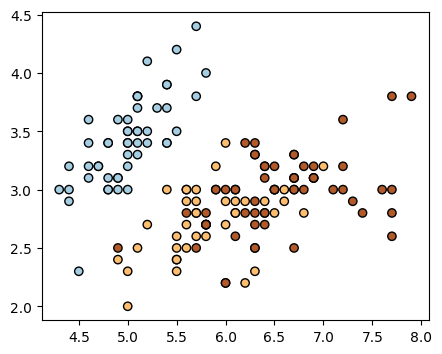

In [ ]:
_, ax = plt.subplots(figsize=(5,4))
ax.scatter(iris_x[:,0], iris_x[:,1], c=iris_y, edgecolors='k', cmap='Paired')

In [ ]:
# Instance kNN object
n_neighbors = 9
knn = kNN(n_neighbors = n_neighbors , metric = "euclidean")

# Training
knn.fit( iris_x , iris_y ) # (num_samples, num_features), (num_samples)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [ ]:
## Plot decision boundaries
#1. Determine min-max values in each axis
h_min, h_max = iris_x[:,0].min()-0.1 , iris_x[:,0].max()+0.1
v_min, v_max = iris_x[:,1].min()-0.1 , iris_x[:,1].max()+0.1

#2.
ptos = 200

h_grid, v_grid = np.meshgrid(np.linspace(h_min,h_max,ptos), np.linspace(v_min,v_max,ptos))

#3 Compute predictions
pred_grid = knn.predict(np.c_[h_grid.ravel(),v_grid.ravel()])

#4 Reshape predictions to grid
pred_grid = pred_grid.reshape(h_grid.shape)
##Crear una función que grafique las fronteras de desición

[]

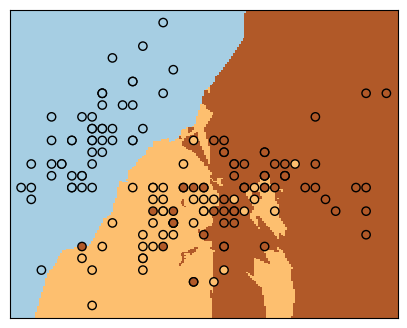

In [ ]:
_, ax=plt.subplots(figsize=(5,4))

ax.pcolormesh( h_grid , v_grid , pred_grid , cmap = "Paired")

# Scatter real values
ax.scatter ( iris_x[:,0] , iris_x[:,1] , c = iris_y , edgecolors = 'k', cmap = "Paired")

ax.set_xticks(())
ax.set_yticks(())

## Using the Fruits dataset

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # Load the fruits dataset
fruit_data = pd.read_csv('/content/drive/MyDrive/Semestre 9/Machine learning/machine_learning/Sem_03/fruits_data_ext.csv', index_col=0)
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.400000,7.300000,0.550000
1,1,apple,granny_smith,180.0,8.000000,6.800000,0.590000
2,1,apple,granny_smith,176.0,7.400000,7.200000,0.600000
3,2,mandarin,mandarin,86.0,6.200000,4.700000,0.800000
4,2,mandarin,mandarin,84.0,6.000000,4.600000,0.790000
...,...,...,...,...,...,...,...
54,4,lemon,unknown,119.0,6.322908,8.722908,0.721145
55,4,lemon,unknown,124.0,6.802490,8.202490,0.745125
56,4,lemon,unknown,145.0,7.829831,10.029831,0.826492
57,4,lemon,unknown,171.0,7.763532,9.763532,0.783177


In [ ]:
fruits_x = fruit_data[['width','color_score']]
fruits_x

,width,color_score
0,8.400000,0.550000
1,8.000000,0.590000
2,7.400000,0.600000
3,6.200000,0.800000
4,6.000000,0.790000
...,...,...
54,6.322908,0.721145
55,6.802490,0.745125
56,7.829831,0.826492
57,7.763532,0.783177


In [ ]:
fruits_x = fruit_data[['width','height']]  # Features. We'll pick 2
fruits_y = fruit_data[['fruit_label']]  # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_x), np.asarray(fruits_y)

# Print shapes
print (fruits_x.shape, fruits_y.shape)

(177, 2) (177, 1)


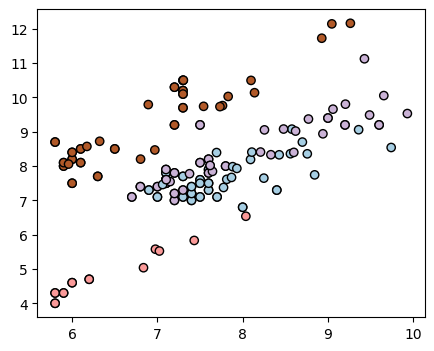

In [ ]:
_, ax = plt.subplots(figsize=(5,4))
ax.scatter(fruits_x[:,0], fruits_x[:,1], c=fruits_y, edgecolors='k', cmap='Paired')

In [ ]:
# Instance kNN object
#manhattan,euclidean,minkowski
n_neighbors =  5
knn = kNN(n_neighbors = n_neighbors , metric = "manhattan")

# Training
knn.fit( fruits_x, fruits_y ) # (num_samples, num_features), (num_samples)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan')

### Función para los boundaries y gráfica



In [ ]:
#Plot decision boundaries
def desBound(horiz,vert, etiquetas,ptos, base, altura):
  ##Horiz : Matriz con los datos del eje horizontal ej: iris_x[:,0]
  ##Vert  : Matriz con los datos del eje vertical ej: iris_x[:,1]
  #etiquetas : Array con las etiquetas de los datos ej: iris_y
  ##ptos  : cantidad de puntos equidistantes para el mesh
  ##base  : ancho de la gráfica
  ##altura: alto de la gráfica

  #1. Determine min-max values in each axis
  h_min, h_max = horiz.min()-0.1 , horiz.max()+0.1
  v_min, v_max = vert.min()-0.1 , vert.max()+0.1

  h_grid, v_grid = np.meshgrid(np.linspace(h_min,h_max,ptos), np.linspace(v_min,v_max,ptos))

  #3 Compute predictions
  pred_grid = knn.predict(np.c_[h_grid.ravel(),v_grid.ravel()])

  #4 Reshape predictions to grid
  pred_grid = pred_grid.reshape(h_grid.shape)
  ##Crear una función que grafique las fronteras de desición

  _, ax=plt.subplots(figsize=(base,altura))

  ax.pcolormesh( h_grid , v_grid , pred_grid , cmap = "Paired")

  # Scatter real values
  ax.scatter ( horiz , vert , c = etiquetas , edgecolors = 'k', cmap = "Paired")

  ax.set_xticks(())
  ax.set_yticks(())


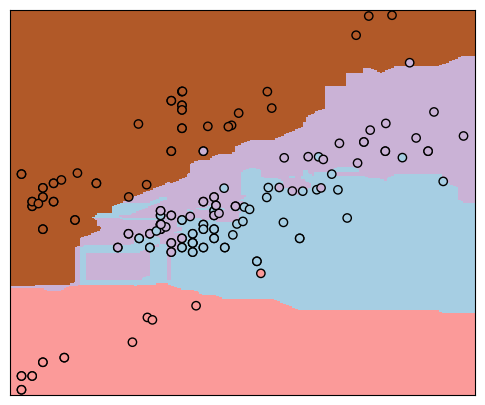

In [ ]:
#Plot decision boundaries
desBound(fruits_x[:,0],fruits_x[:,1],fruits_y,300,6,5)

In [ ]:
def grafica(horiz,vert,etiquetas,base,altura):
  ##Horiz : Matriz con los datos del eje horizontal ej: iris_x[:,0]
  ##Vert  : Matriz con los datos del eje vertical ej: iris_x[:,1]

  _, ax=plt.subplots(figsize=(base,altura))

  ax.pcolormesh( h_grid , v_grid , pred_grid , cmap = "Paired")

  # Scatter real values
  ax.scatter ( horiz , vert , c = etiquetas , edgecolors = 'k', cmap = "Paired")

  ax.set_xticks(())
  ax.set_yticks(())